In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
k1 = 0.04
k2 = 1e4
k3 = 3e7

In [21]:
def F(iu1,iu2,iu3):
  return [-k1*iu1 + k2*iu2*iu3, k1*iu1 - k2*iu2*iu3 - k3*iu2*iu2, k3*iu2*iu2]

In [28]:
def J(iu1,iu2,iu3):
  return np.array([[-k1,k2*iu3,k2*iu2],
          [k1,-k2*iu3-2*k3*iu2,-k2*iu2],
          [0,2*k3*iu2,0]])

In [29]:
Tf = 1000.0
#h = 1.0e-3
#N = int(Tf/h)

In [36]:
u1 = [1]
u2 = [0]
u3 = [0]
T = [0]

while (T[-1]<1.0):
  l,_ = np.linalg.eig(J(u1[-1],u2[-1],u3[-1]))
  h = min((2.0/abs(l)).min() * 0.8,0.01)
  f = F(u1[-1],u2[-1],u3[-1])
  u1.append(u1[-1]+h*f[0])
  u2.append(u2[-1]+h*f[1])
  u3.append(u3[-1]+h*f[2])
  T.append(T[-1]+h)

/tmp/ipython-input-2986020682.py:8: RuntimeWarning: divide by zero encountered in divide
  h = min((2.0/abs(l)).min() * 0.8,0.01)


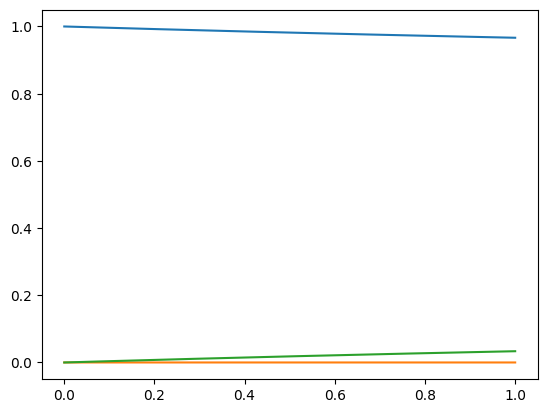

In [34]:
plt.plot(T,u1)
plt.plot(T,u2)
plt.plot(T,u3)
plt.show()